## Objetivos del Trabajo
El objetivo principal del trabajo es trabajar sobre la calidad del vino clasificando en mejores resultados.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [34]:
URL = 'https://raw.githubusercontent.com/Adrian-Cancino/DataScience/refs/heads/main/Data/WineQT.csv'

In [35]:
datos = pd.read_csv(URL)
datos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


#Traduzco nombres de columnas

In [36]:
columnas_traducidas = {
    "fixed acidity": "acidez_fija",
    "volatile acidity": "acidez_volatil",
    "citric acid": "acido_citrico",
    "residual sugar": "azucar_residual",
    "chlorides": "cloruros",
    "free sulfur dioxide": "dioxido_azufre_libre",
    "total sulfur dioxide": "dioxido_azufre_total",
    "density": "densidad",
    "pH": "pH",
    "sulphates": "sulfatos",
    "alcohol": "alcohol",
    "quality": "calidad",
    "Id": "Id"
}

datos.rename(columns=columnas_traducidas, inplace=True)

In [37]:
datos

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


##Elimino la columna ID ya que no resulta relevante.

In [38]:
datos.drop('Id', axis=1, inplace=True)
datos.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [39]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidez_fija           1143 non-null   float64
 1   acidez_volatil        1143 non-null   float64
 2   acido_citrico         1143 non-null   float64
 3   azucar_residual       1143 non-null   float64
 4   cloruros              1143 non-null   float64
 5   dioxido_azufre_libre  1143 non-null   float64
 6   dioxido_azufre_total  1143 non-null   float64
 7   densidad              1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulfatos              1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  calidad               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [40]:
datos.isnull().sum()

,0
acidez_fija,0
acidez_volatil,0
acido_citrico,0
azucar_residual,0
cloruros,0
dioxido_azufre_libre,0
dioxido_azufre_total,0
densidad,0
pH,0
sulfatos,0


In [41]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
acidez_fija,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
acidez_volatil,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
acido_citrico,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
azucar_residual,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
cloruros,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
dioxido_azufre_libre,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
dioxido_azufre_total,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
densidad,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulfatos,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [42]:
datos.calidad.unique()

array([5, 6, 7, 4, 8, 3])

In [43]:
matrix_corr = datos.corr()
matrix_corr

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
acidez_fija,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
acidez_volatil,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
acido_citrico,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
azucar_residual,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
cloruros,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
dioxido_azufre_libre,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
dioxido_azufre_total,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
densidad,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulfatos,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [44]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
datos.corr(method=histogram_intersection)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
acidez_fija,1.0,607.3,306.7,2864.6,99.4,8326.9,9476.3,1139.3,3784.5,751.8,9279.4,6427.4
acidez_volatil,607.3,1.0,259.8,607.3,98.9,607.3,607.3,605.4,607.3,546.5,607.3,607.3
acido_citrico,306.7,259.8,1.0,306.7,84.5,306.7,306.7,306.7,306.7,304.4,306.7,306.7
azucar_residual,2864.6,607.3,306.7,1.0,99.4,2855.3,2894.2,1139.2,2609.0,751.7,2868.0,2792.3
cloruros,99.4,98.9,84.5,99.4,1.0,99.4,99.4,99.4,99.4,99.4,99.4,99.4
dioxido_azufre_libre,8326.9,607.3,306.7,2855.3,99.4,1.0,17848.5,1139.3,3768.2,751.8,10160.8,6240.0
dioxido_azufre_total,9476.3,607.3,306.7,2894.2,99.4,17848.5,1.0,1139.3,3784.5,751.8,11842.0,6466.0
densidad,1139.3,605.4,306.7,1139.2,99.4,1139.3,1139.3,1.0,1139.3,741.7,1139.3,1139.3
pH,3784.5,607.3,306.7,2609.0,99.4,3768.2,3784.5,1139.3,1.0,751.8,3784.5,3782.3
sulfatos,751.8,546.5,304.4,751.7,99.4,751.8,751.8,741.7,751.8,1.0,751.8,751.8


In [45]:
fig = px.imshow(matrix_corr, text_auto=True, aspect="auto", zmin=-1, zmax=1)
fig.update_layout(
    title='Matriz de Correlación',
    xaxis_title='Variables',
    yaxis_title='Variables',
    title_x=0.5
)
fig.show()

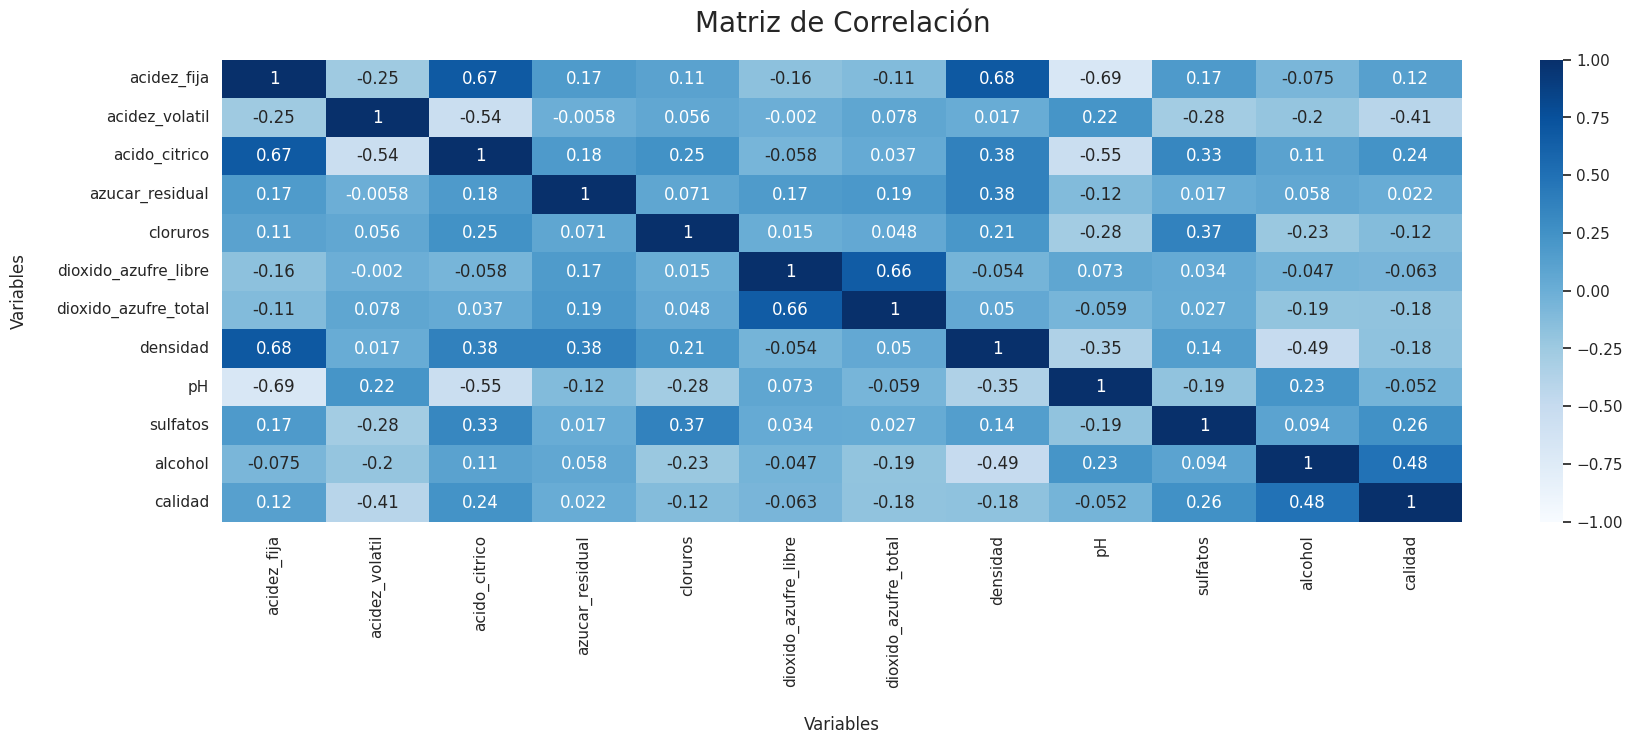

In [46]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.heatmap(datos.corr(), cmap='Blues', annot=True, vmin=-1, vmax=1)
plt.title("Matriz de Correlación", fontsize=20, pad=20)
plt.xlabel("Variables",labelpad=20)
plt.ylabel("Variables",labelpad=20)
plt.show()

In [47]:
calidad_correlacion = matrix_corr['calidad'].sort_values(ascending=False)
calidad_correlacion

,calidad
calidad,1.000000
alcohol,0.484866
sulfatos,0.257710
acido_citrico,0.240821
acidez_fija,0.121970
azucar_residual,0.022002
pH,-0.052453
dioxido_azufre_libre,-0.063260
cloruros,-0.124085
densidad,-0.175208


In [48]:
datos.columns

Index(['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual',
       'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')

In [49]:
cols = ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual',
       'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad']

In [50]:
for col in cols:
  fig = px.box(datos, x='calidad', y=col, color='calidad')
  fig.update_layout(
      title=f'Calidad vs  {col}',
      xaxis_title='Calidad',
      yaxis_title=col,
      title_x=0.5
  )
  fig.show()

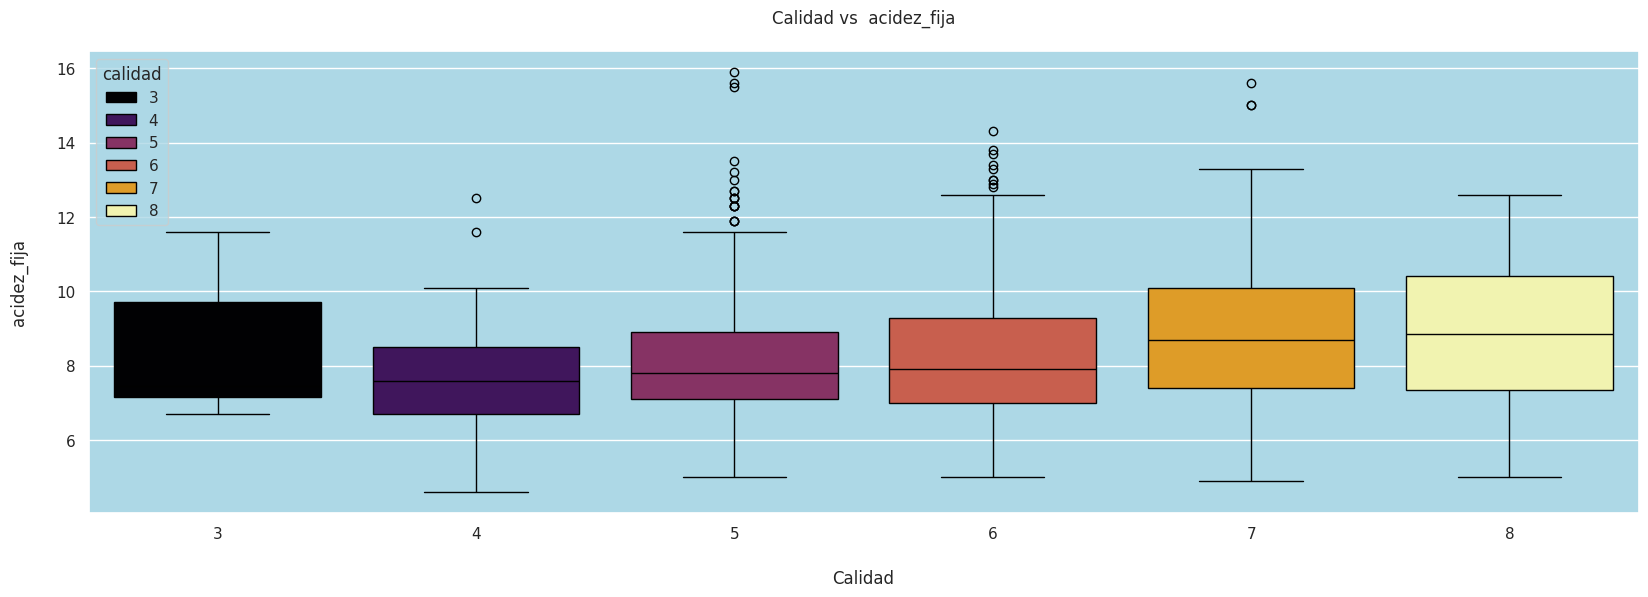

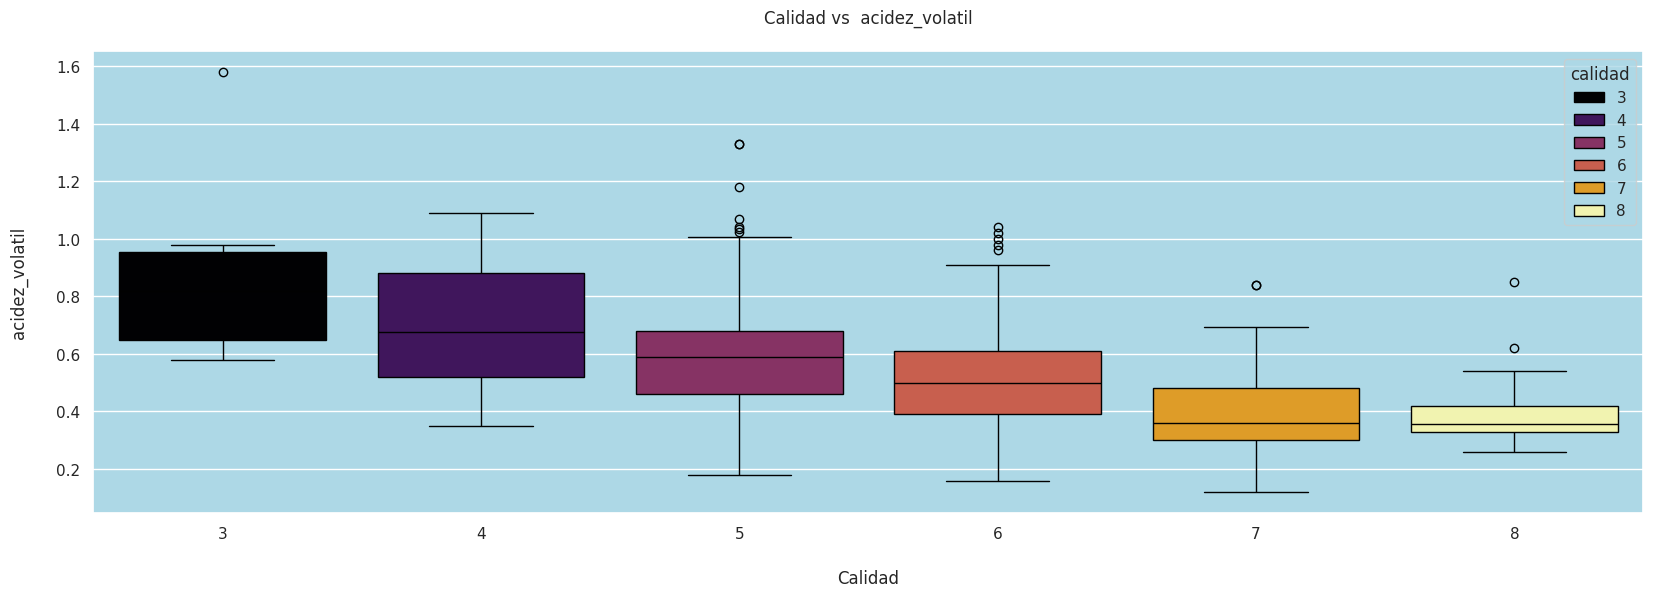

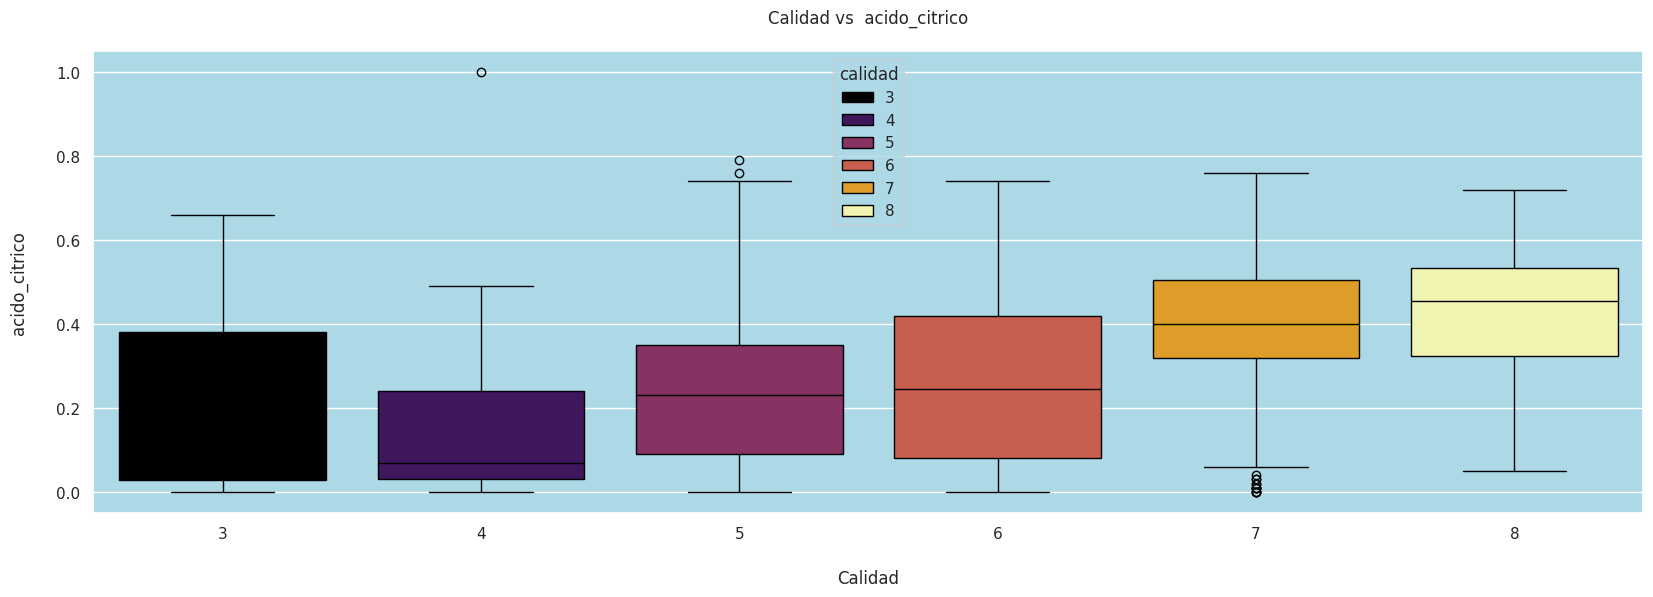

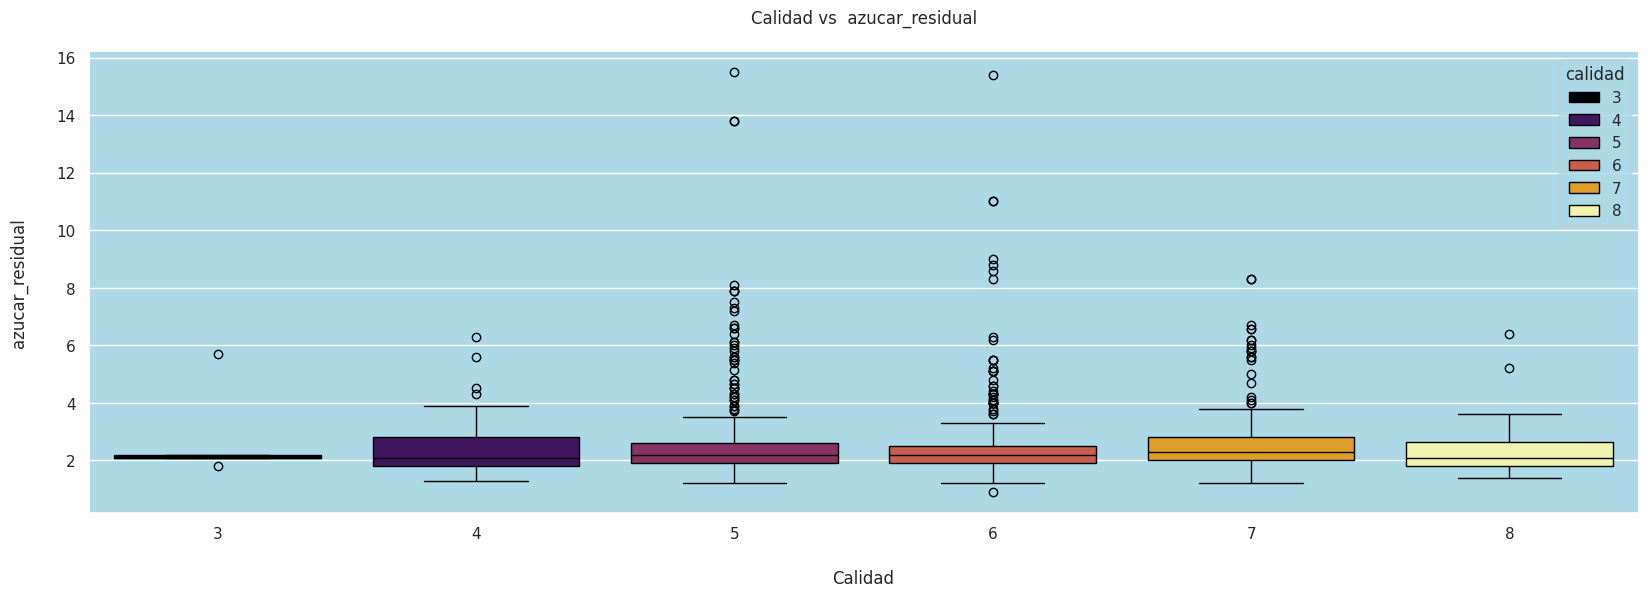

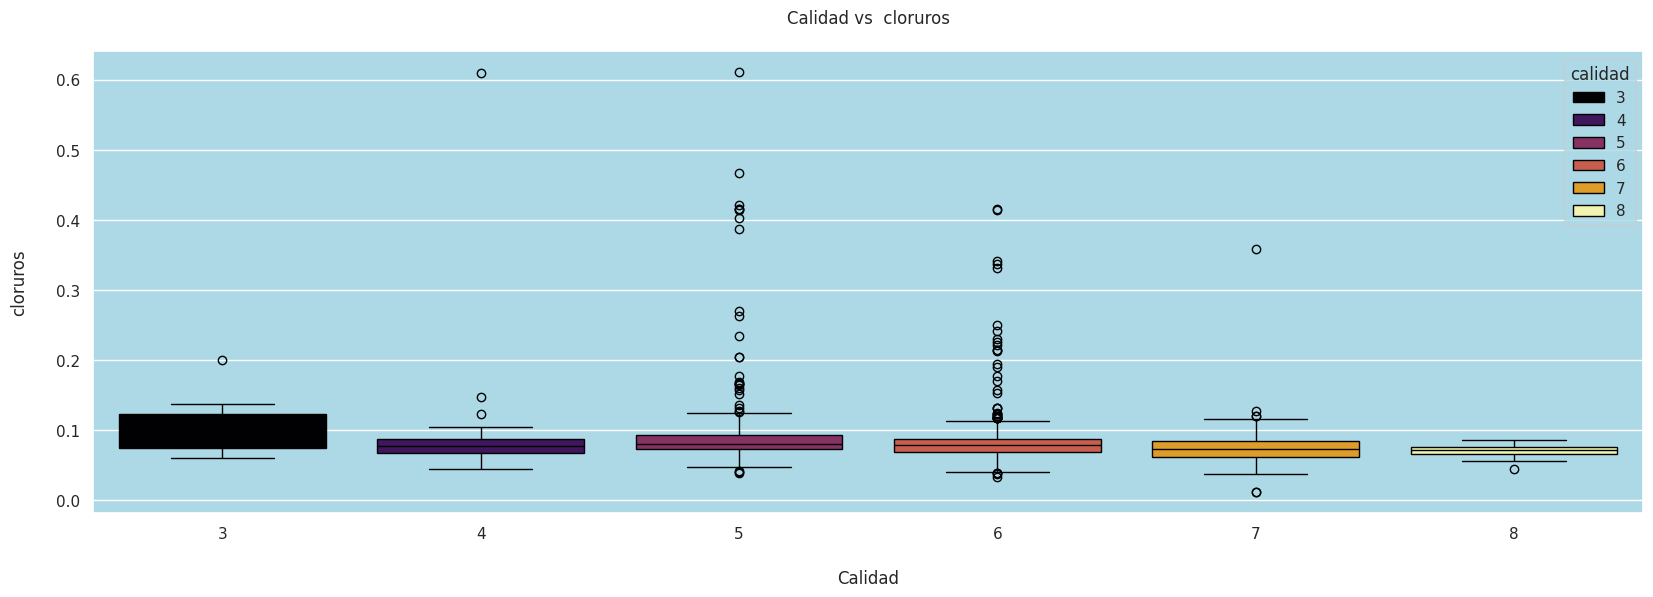

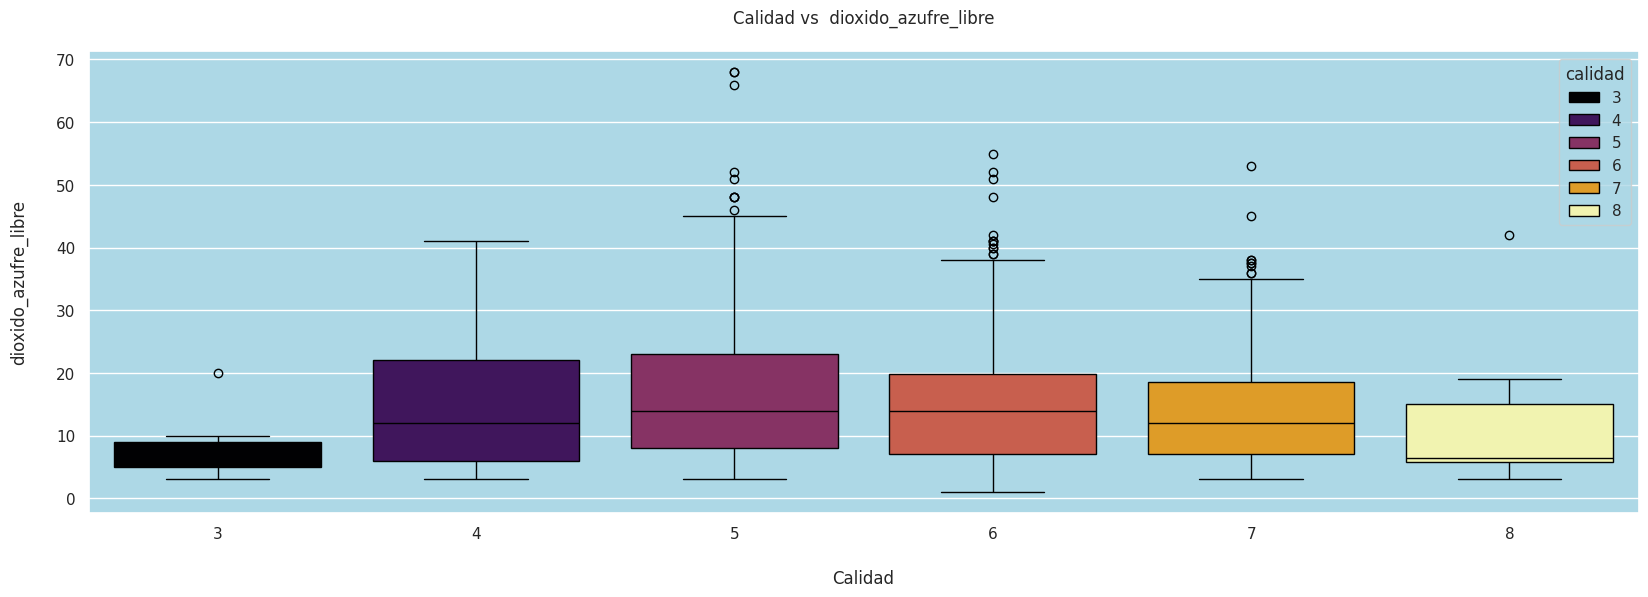

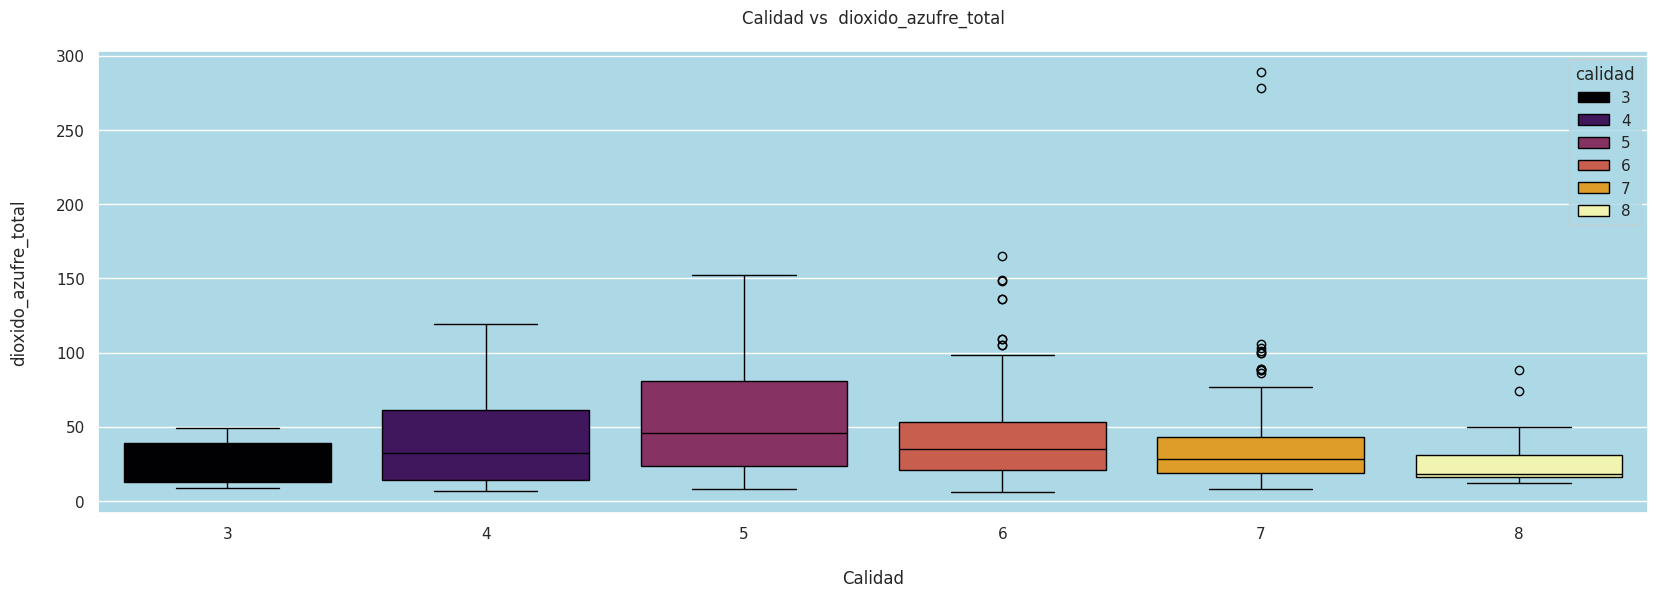

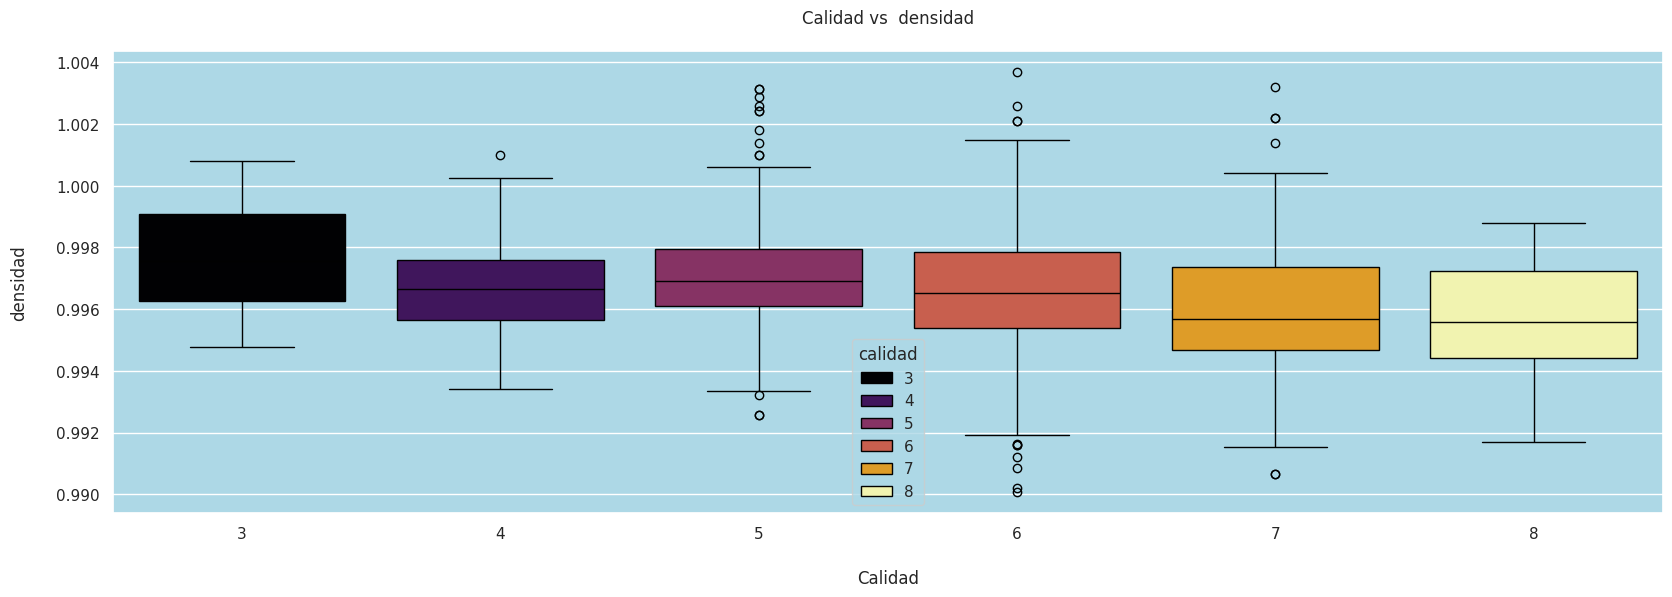

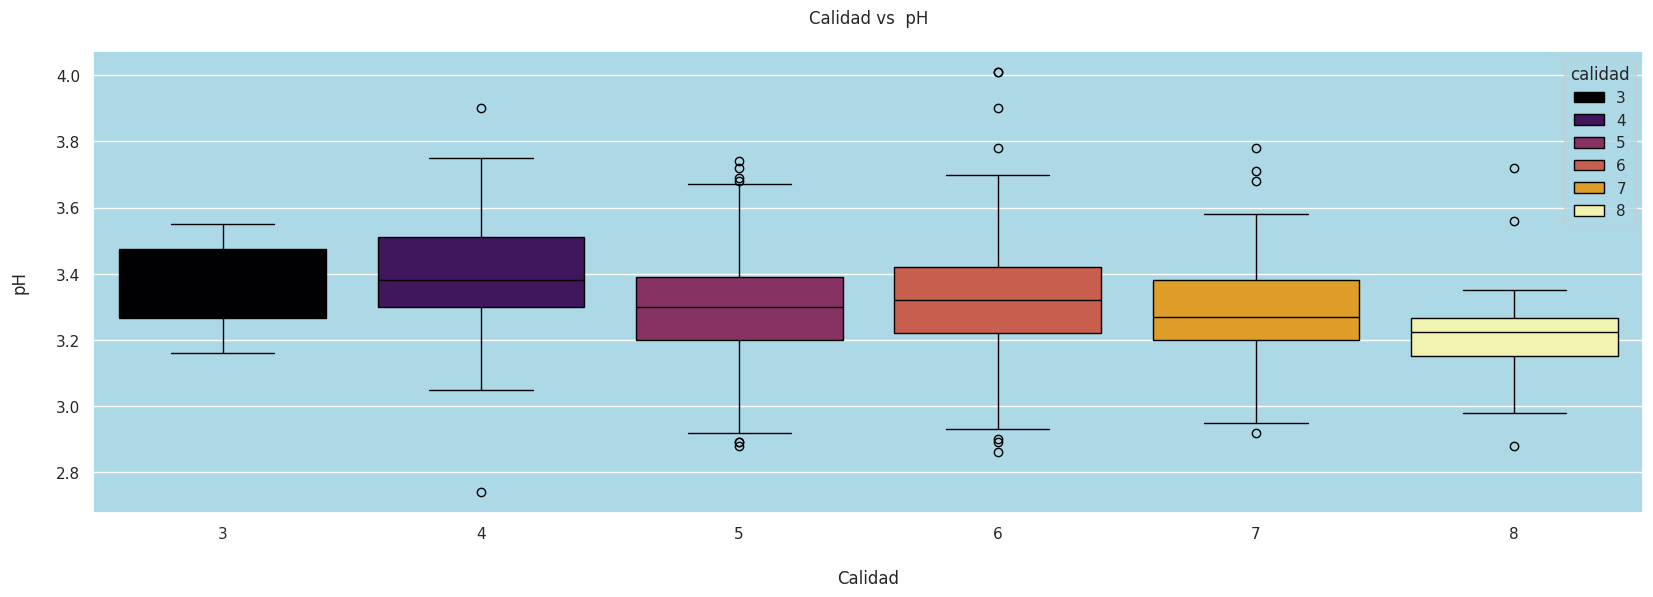

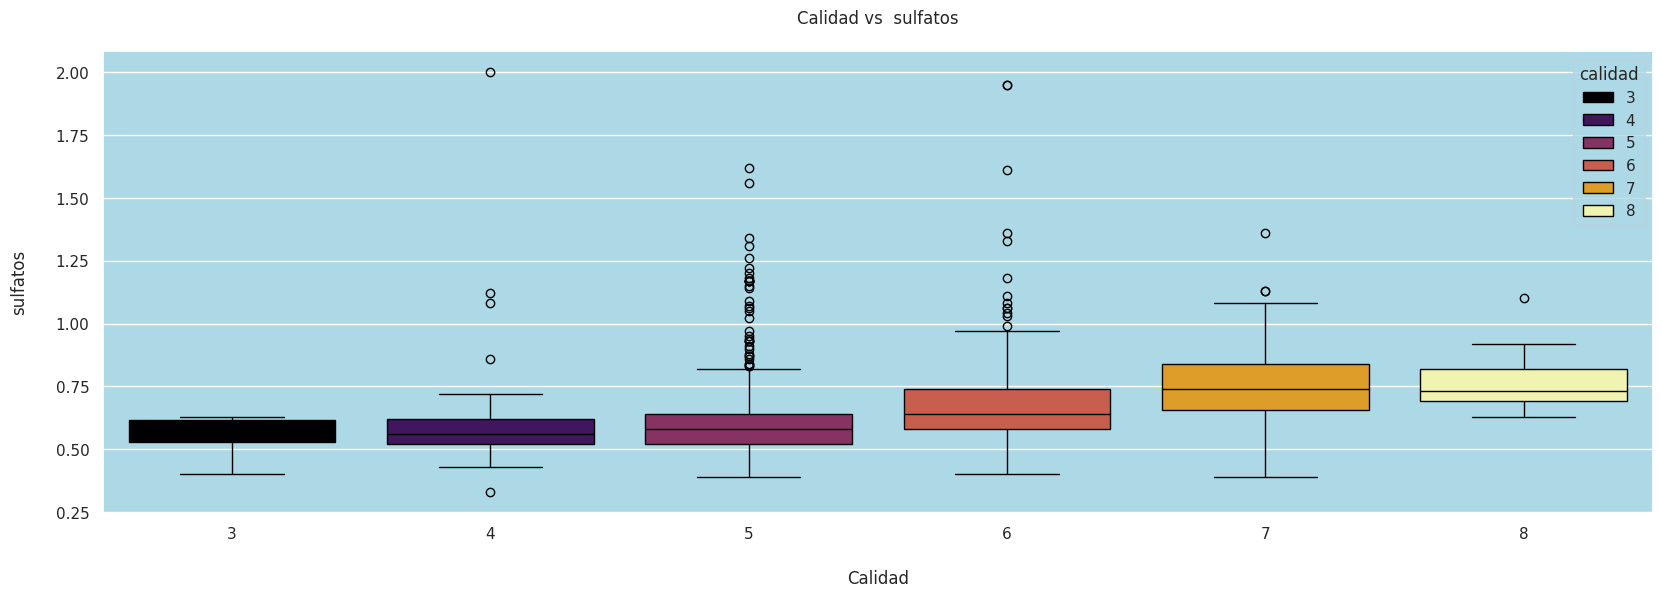

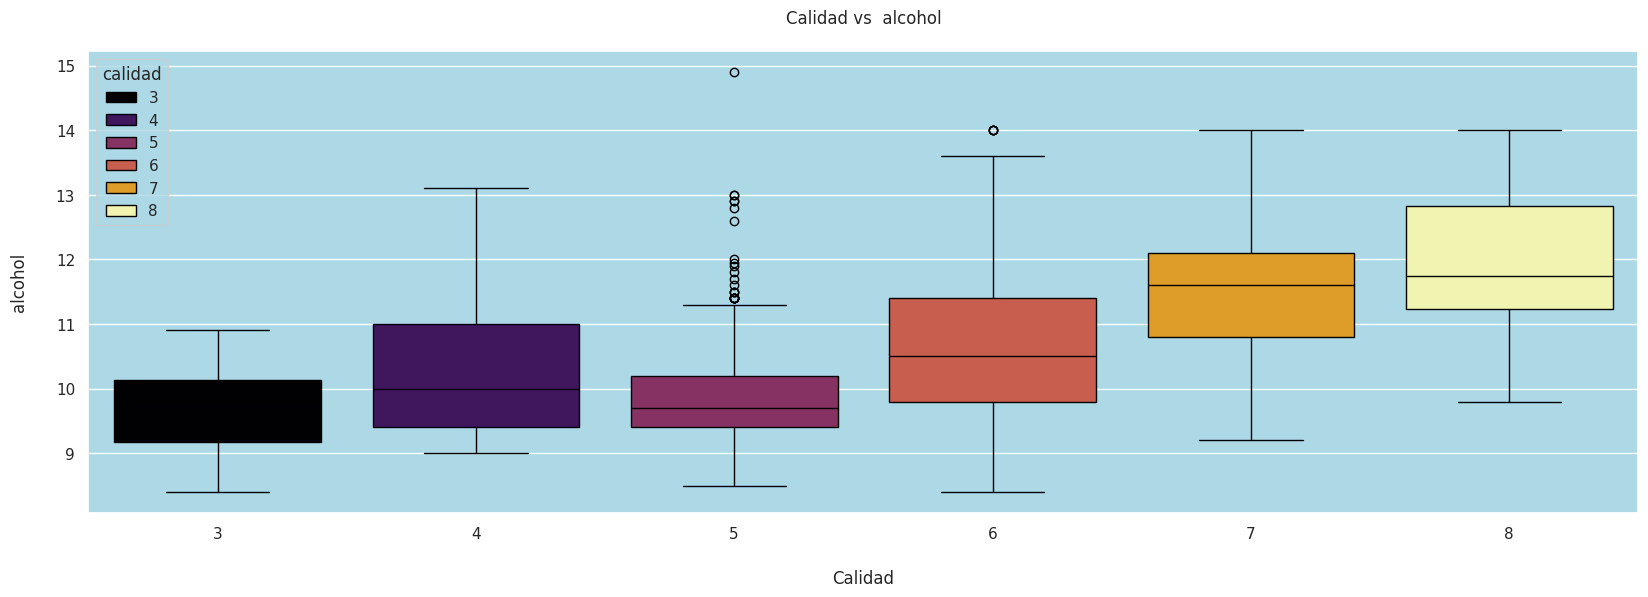

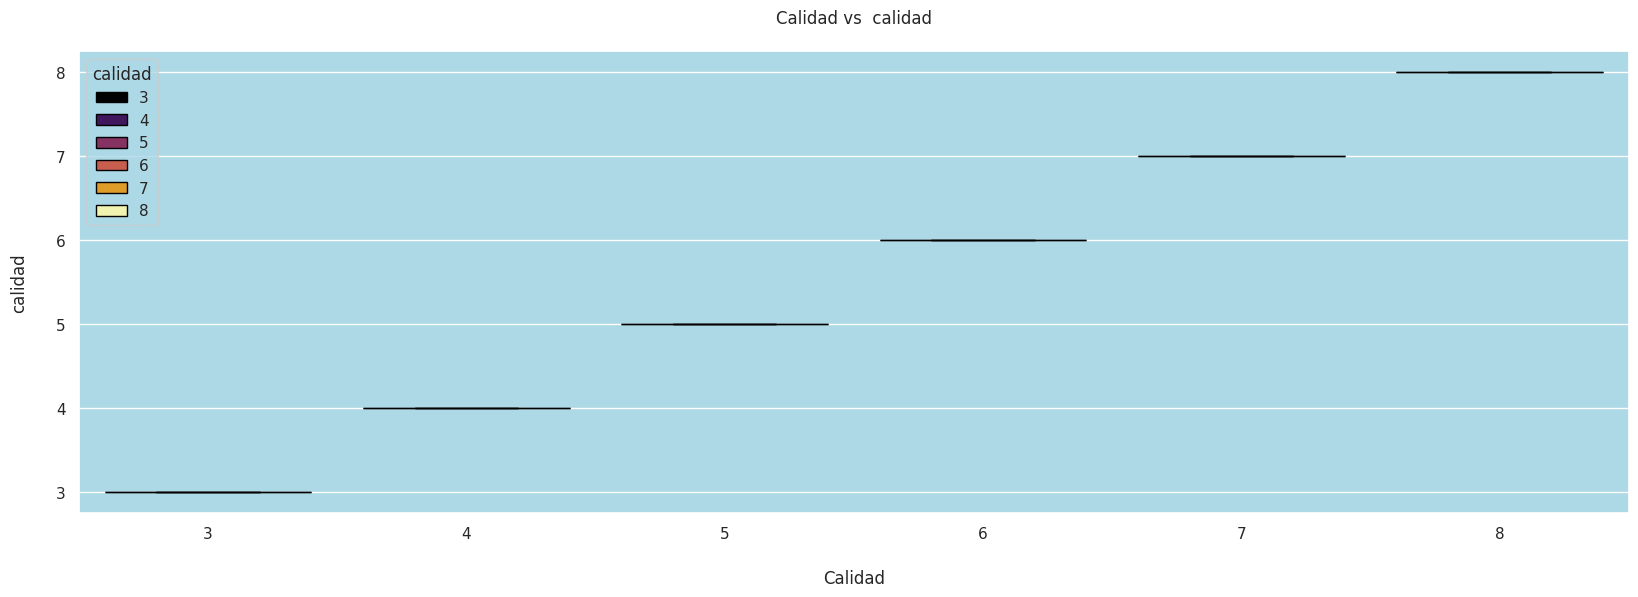

In [51]:
for col in cols:
  sns.set_style(style="darkgrid")
  sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
  plt.figure(figsize=(20, 6))
  sns.boxplot(x='calidad', y=col, data=datos, hue='calidad', palette='inferno')
  plt.title(f'Calidad vs  {col}', pad=20)
  plt.xlabel('Calidad', labelpad=20)
  plt.ylabel(col, labelpad=20)
  plt.show()

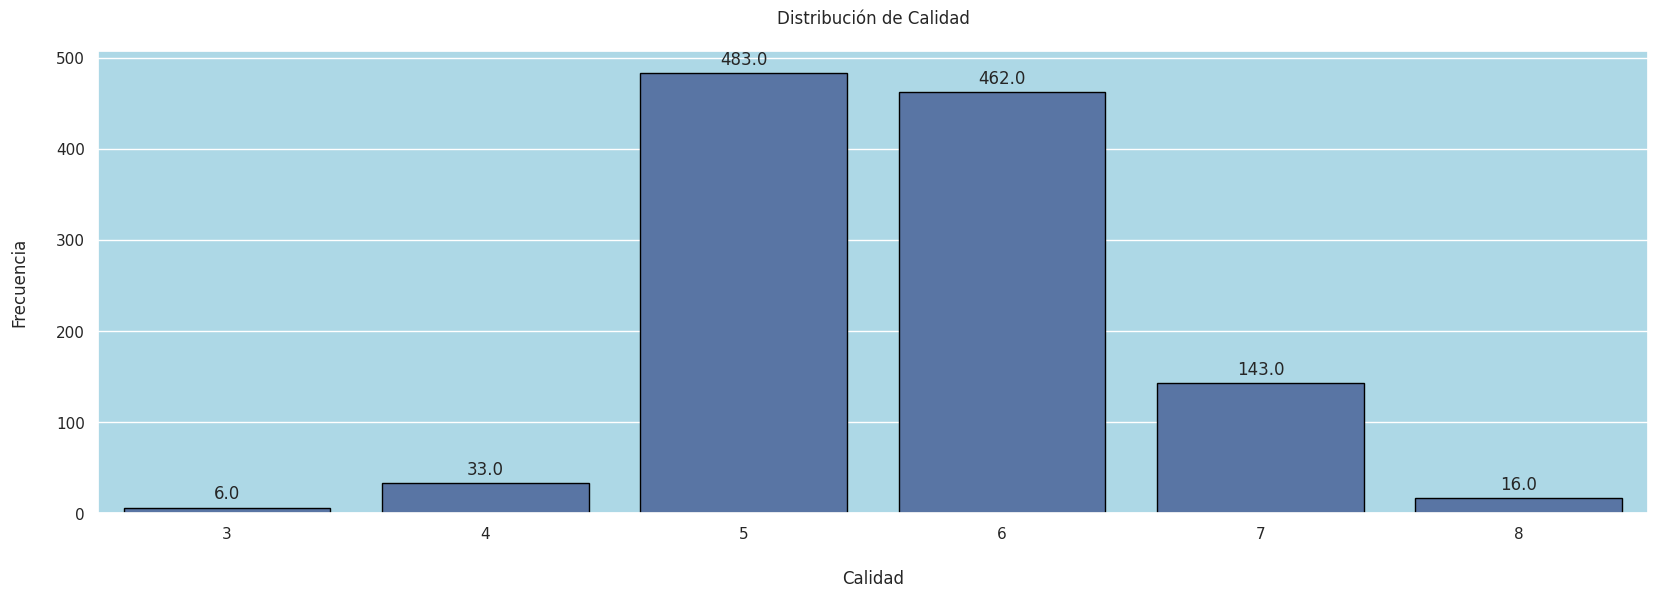

In [52]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
ax = sns.countplot(x='calidad', data=datos, edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribución de Calidad', pad=20)
plt.xlabel('Calidad', labelpad=20)
plt.ylabel('Frecuencia', labelpad=20)
plt.show()

In [53]:
fig = px.histogram(datos, x='calidad', color='calidad')
fig.update_layout(
    title='Distribución de Calidad',
    xaxis_title='Calidad',
    yaxis_title='Frecuencia',
    title_x=0.5
)
fig.show()

In [54]:
datos_valores_calidad = datos.calidad.value_counts()
datos_valores_calidad

,count
calidad,
5,483
6,462
7,143
4,33
8,16
3,6


In [55]:
fig = px.bar(datos_valores_calidad, x=datos_valores_calidad.index, y=datos_valores_calidad.values)
fig.update_layout(
    title='Distribución de Calidad',
    xaxis_title='Calidad',
    yaxis_title='Frecuencia',
    title_x=0.5,
)
fig.show()

In [56]:
datos_log = datos.copy()

for col in cols:
  datos_log[col] = np.log1p(datos_log[col])
  datos_log[col] = datos_log[col].astype(float)
  datos_log[col] = datos_log[col].round(decimals=2)
datos_log

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,2.13,0.53,0.00,1.06,0.07,2.48,3.56,0.69,1.51,0.44,2.34,1.79
1,2.17,0.63,0.00,1.28,0.09,3.26,4.22,0.69,1.44,0.52,2.38,1.79
2,2.17,0.57,0.04,1.19,0.09,2.77,4.01,0.69,1.45,0.50,2.38,1.79
3,2.50,0.25,0.44,1.06,0.07,2.89,4.11,0.69,1.43,0.46,2.38,1.95
4,2.13,0.53,0.00,1.06,0.07,2.48,3.56,0.69,1.51,0.44,2.34,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1.99,0.41,0.12,1.19,0.07,3.40,3.71,0.69,1.49,0.56,2.48,1.95
1139,2.05,0.48,0.08,1.06,0.07,3.37,3.66,0.69,1.49,0.60,2.35,1.95
1140,1.97,0.47,0.08,1.10,0.09,3.50,3.81,0.69,1.49,0.46,2.44,1.79
1141,1.93,0.44,0.10,1.16,0.06,3.69,3.95,0.69,1.51,0.57,2.50,1.95


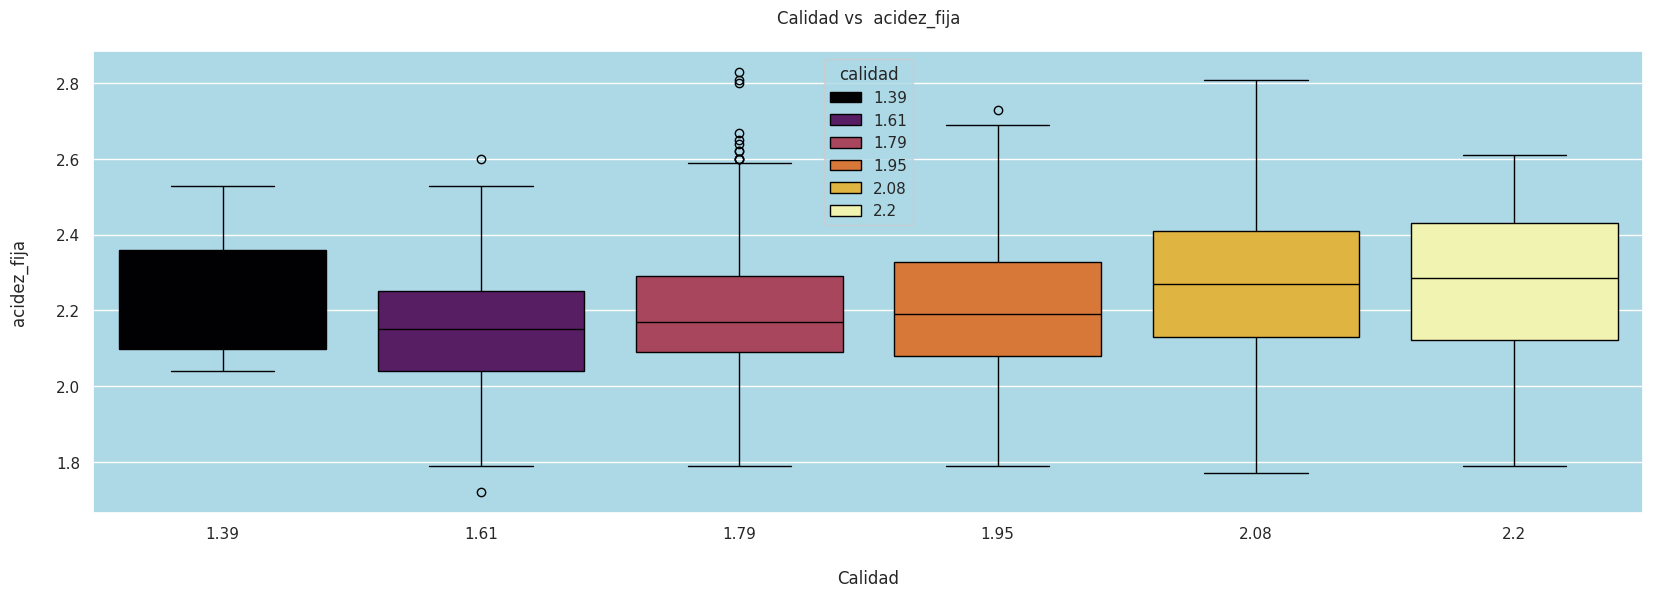

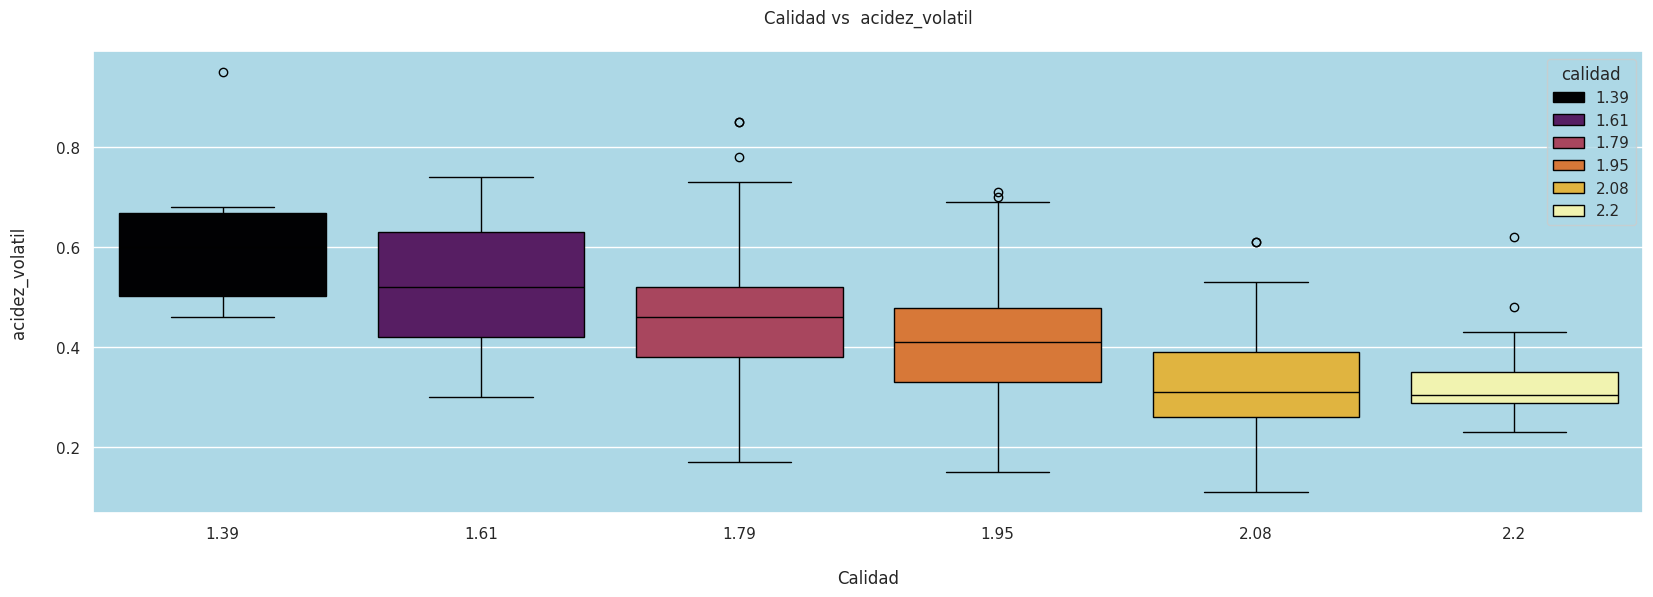

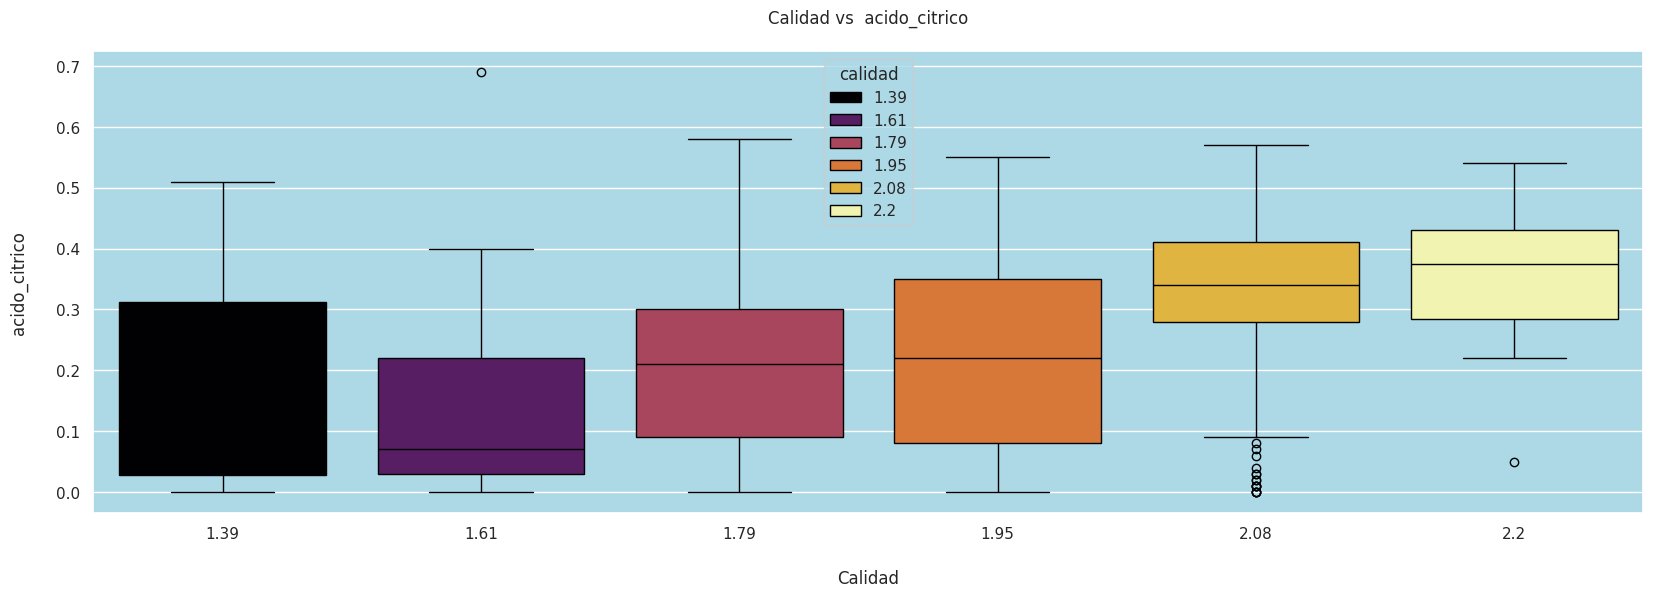

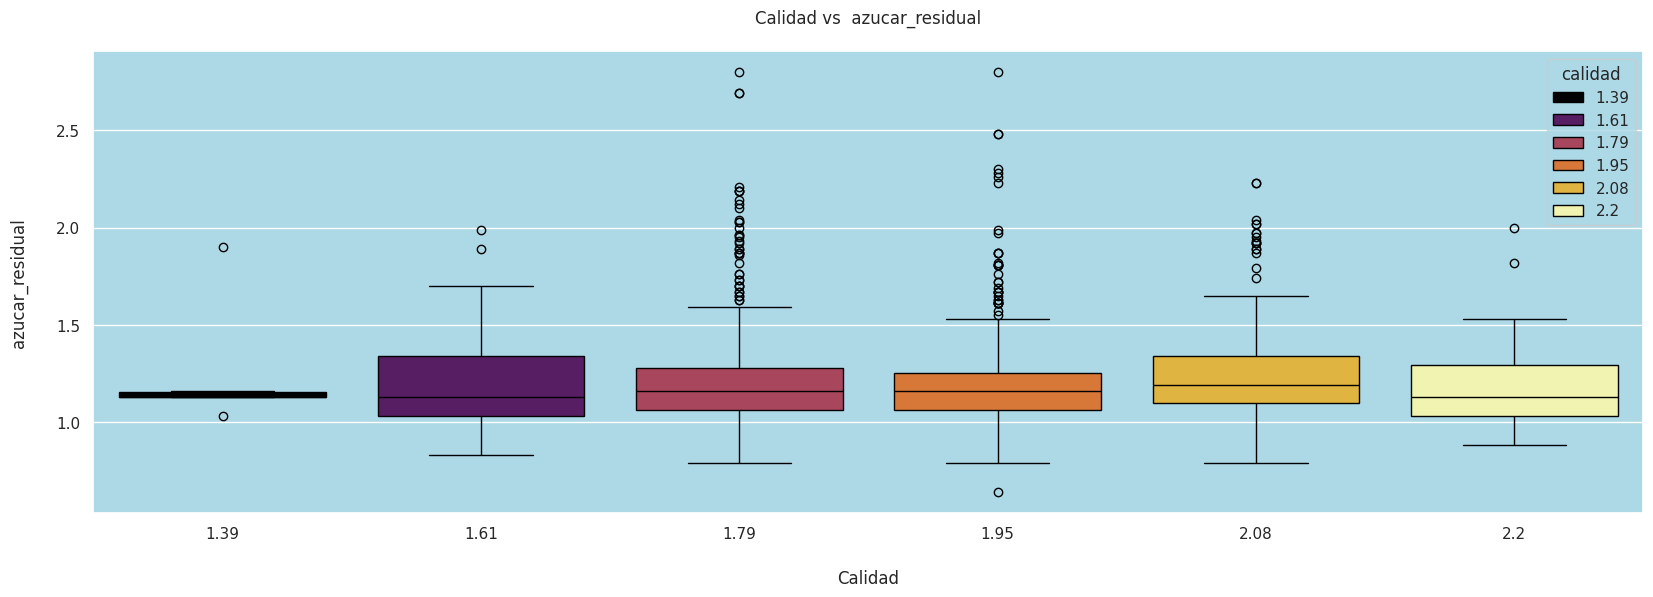

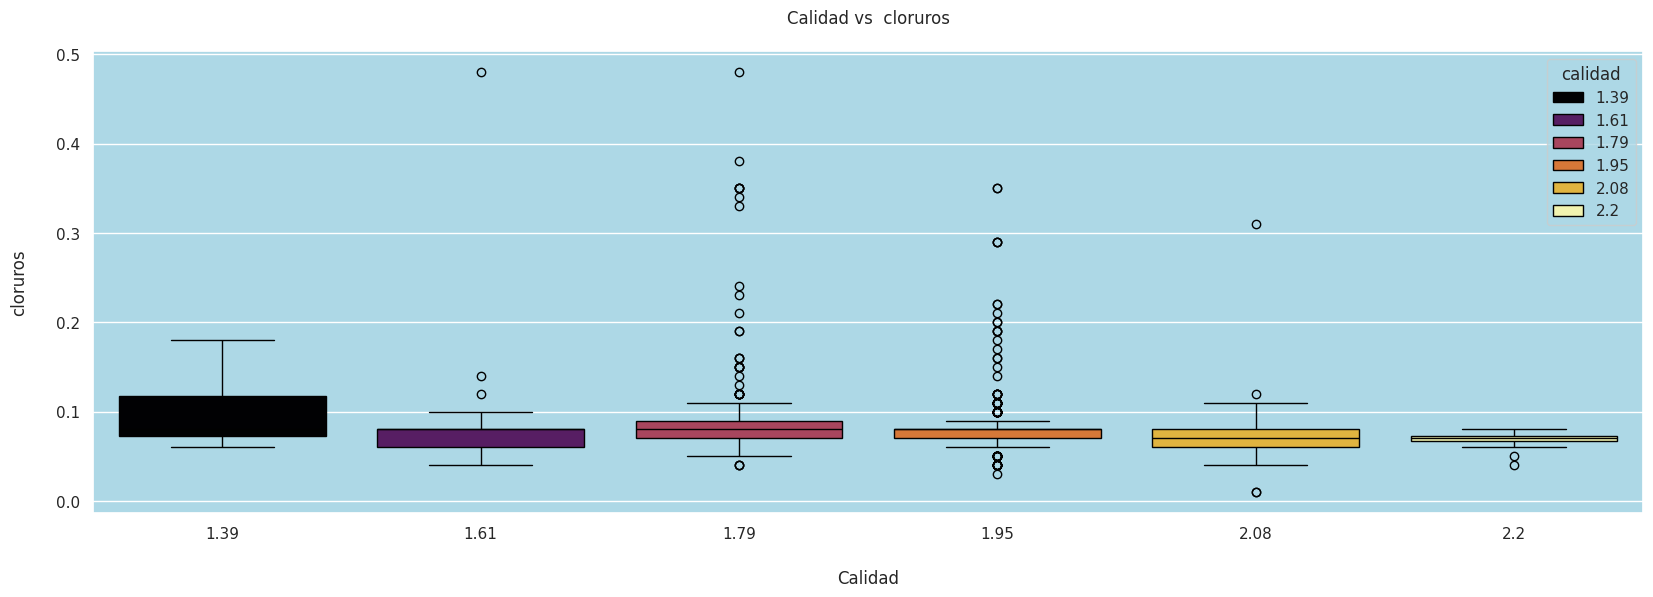

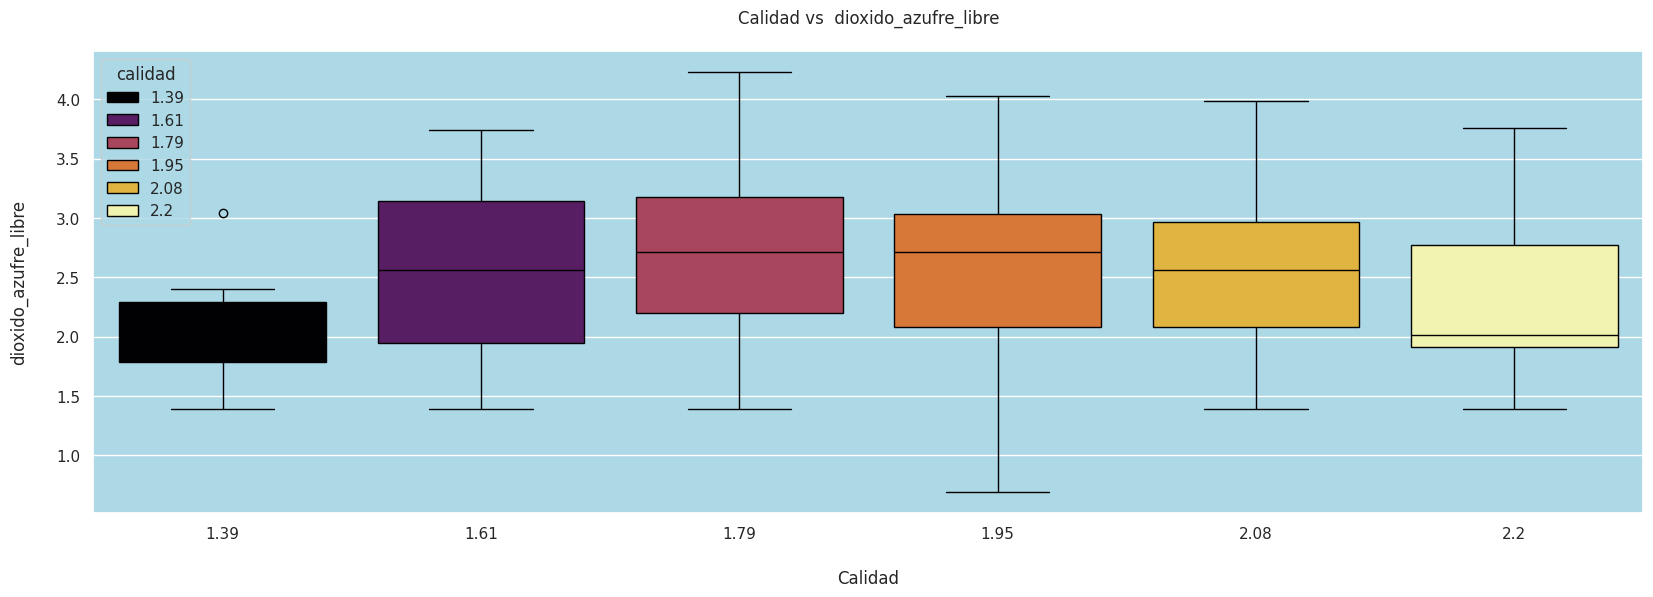

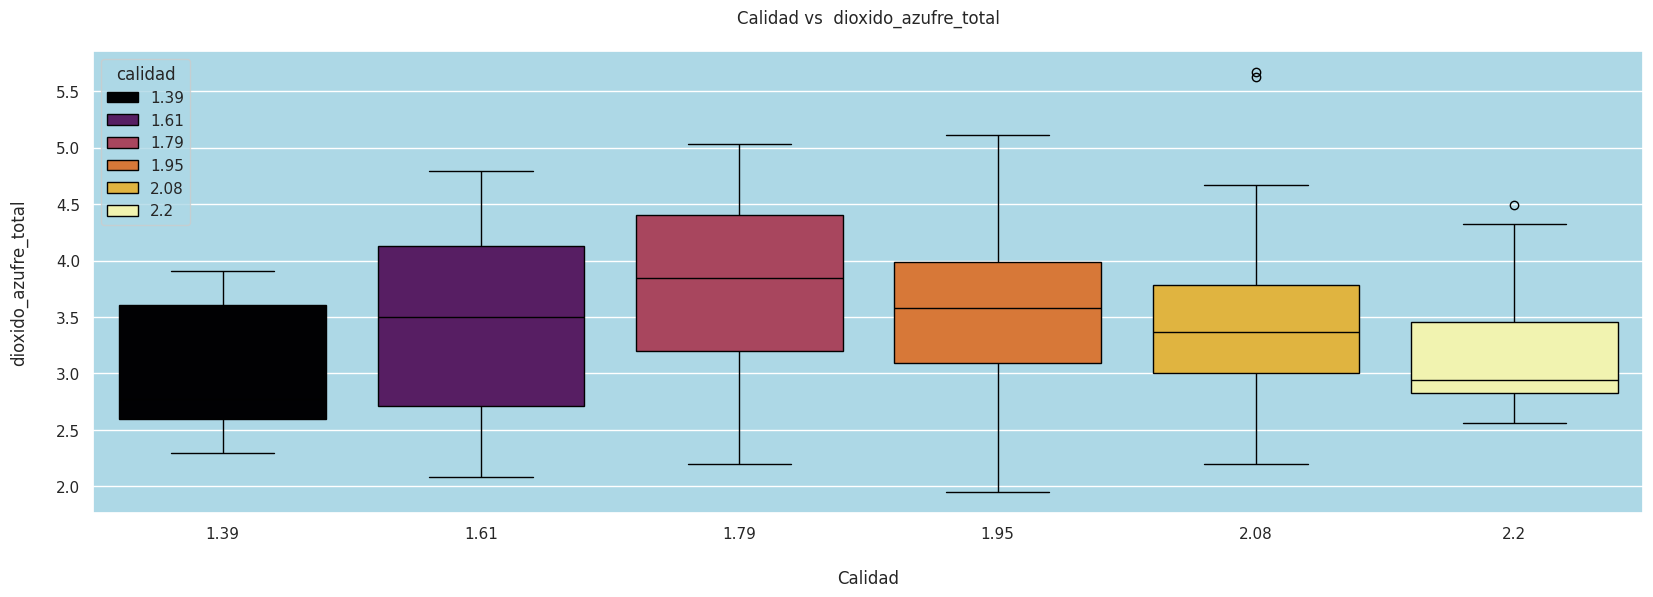

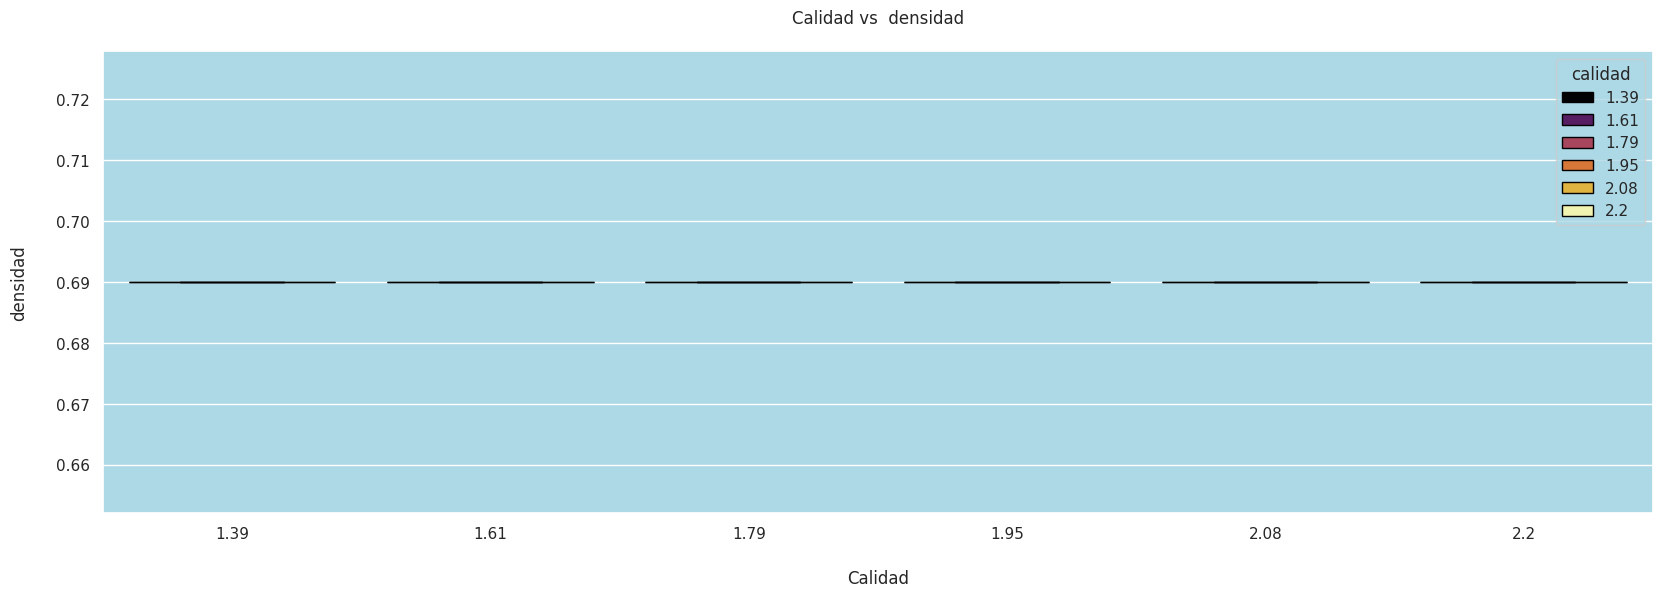

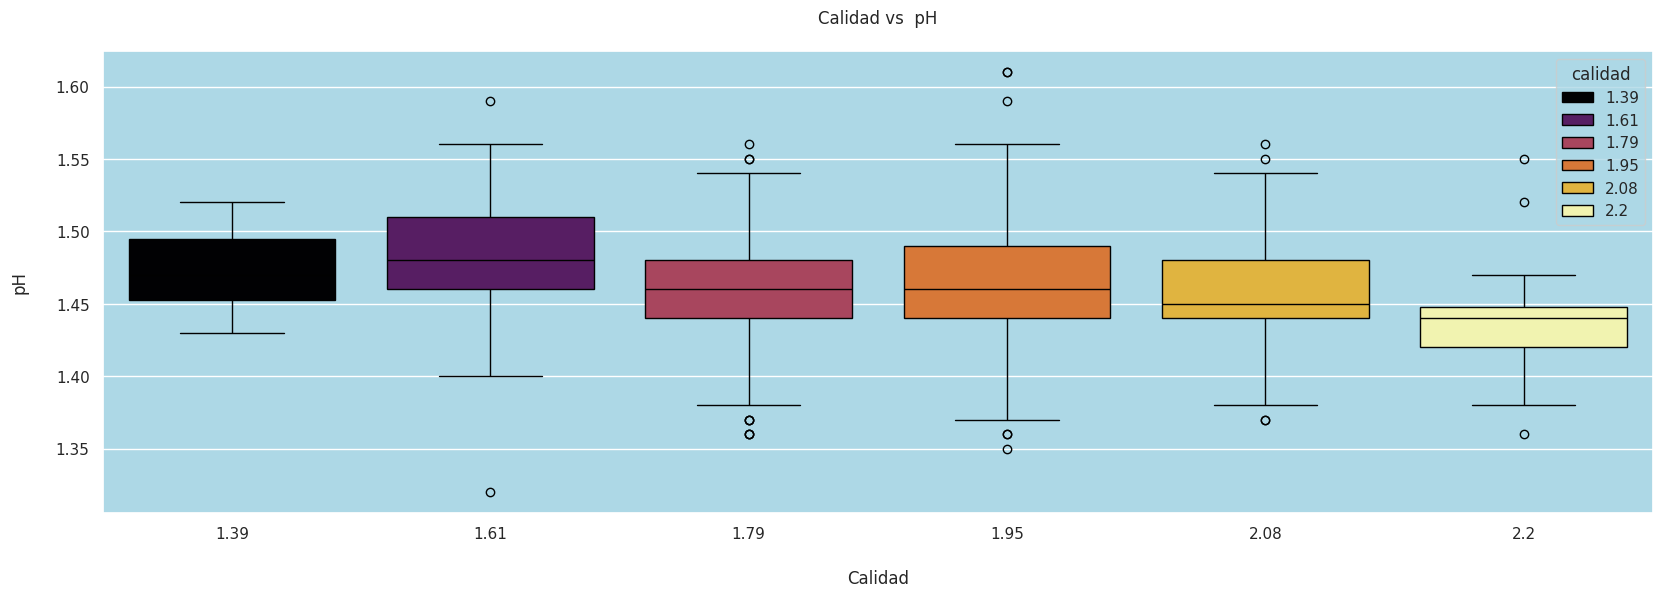

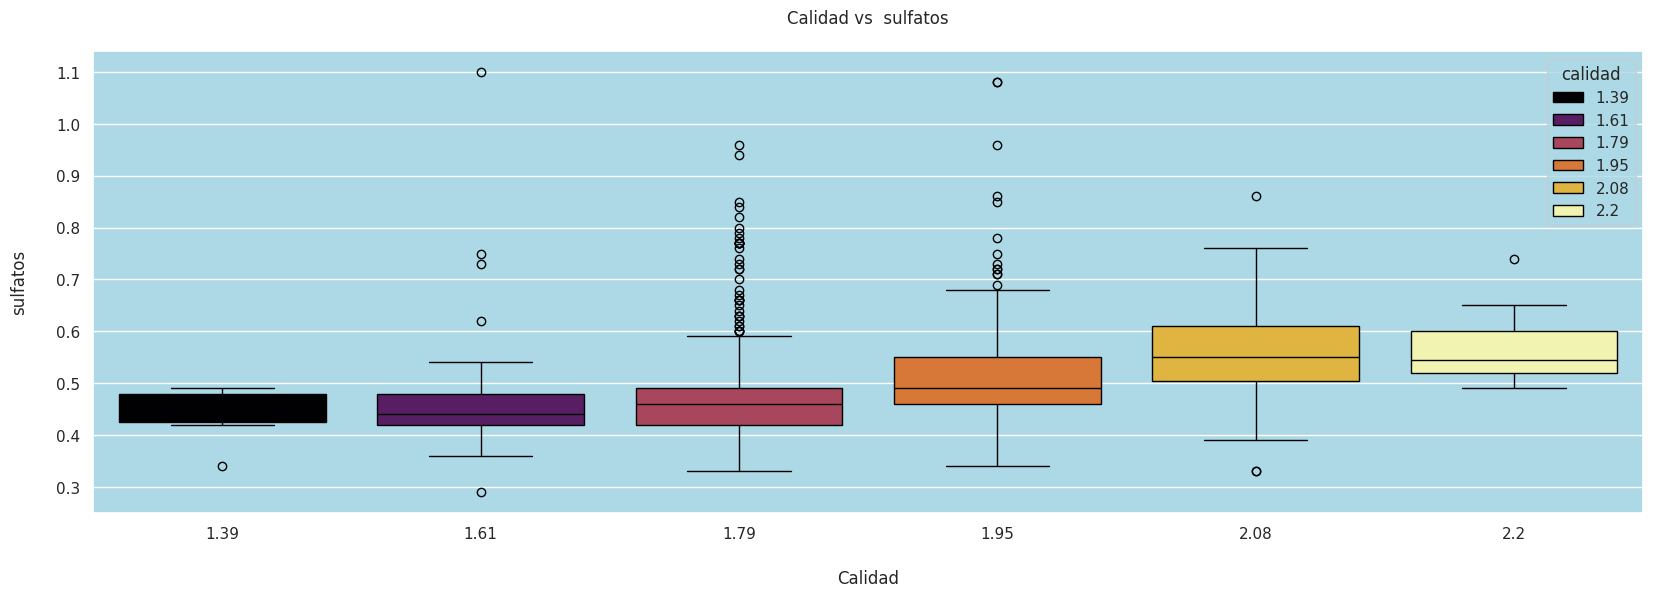

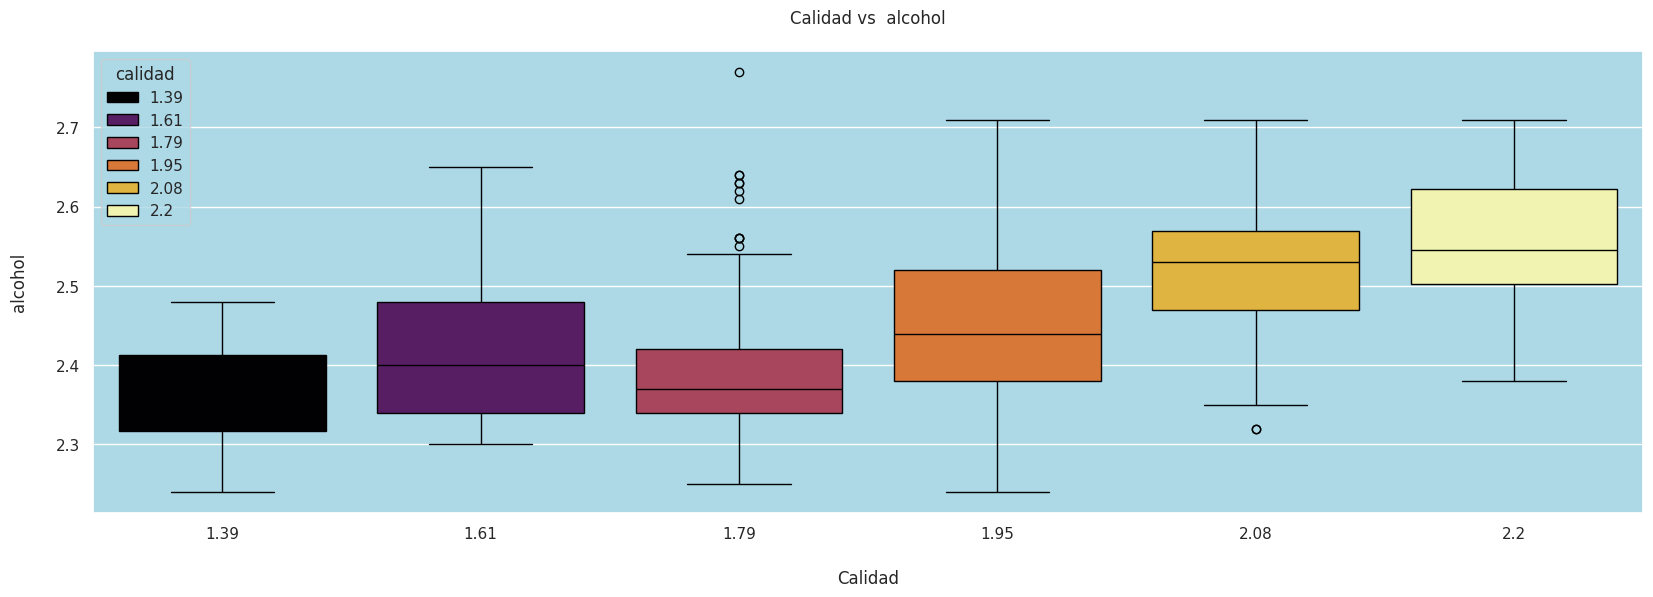

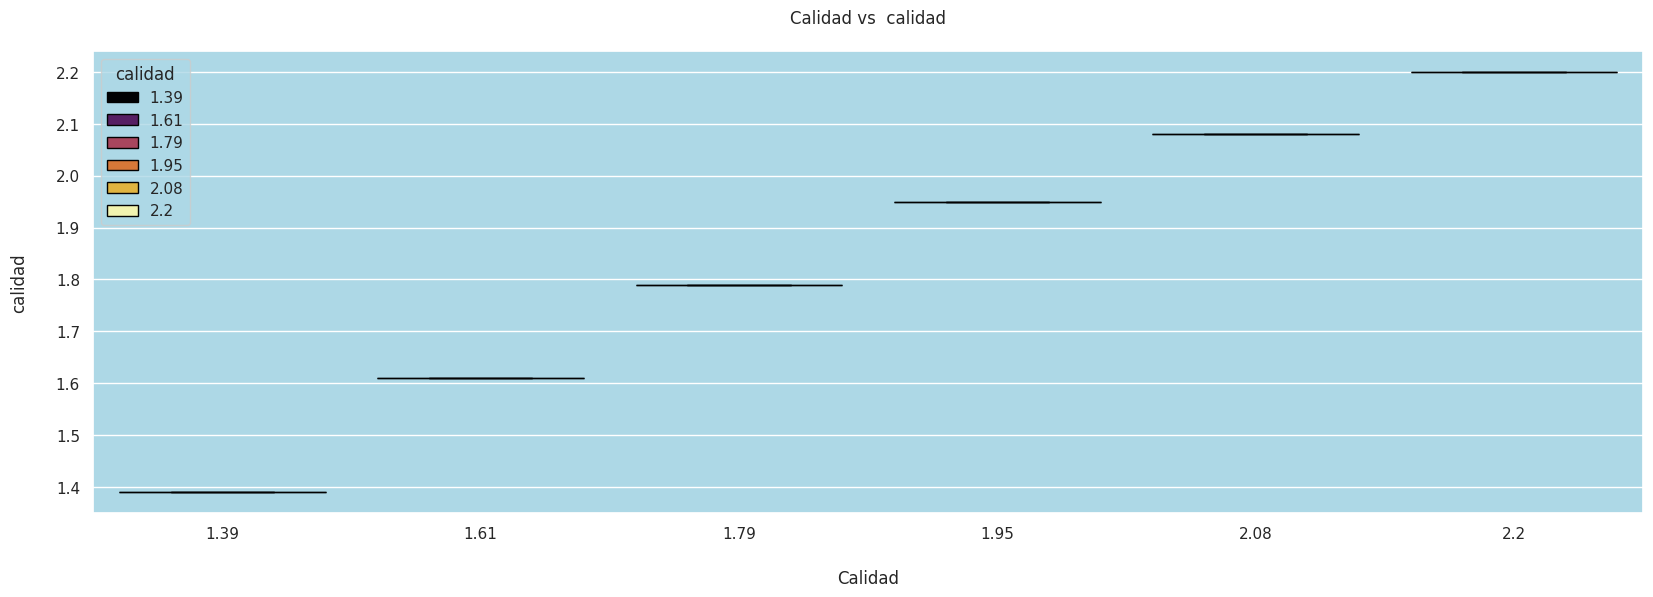

In [57]:
for col in cols:
  sns.set_style(style="darkgrid")
  sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
  plt.figure(figsize=(20, 6))
  sns.boxplot(x='calidad', y=col, data=datos_log, hue='calidad', palette='inferno')
  plt.title(f'Calidad vs  {col}', pad=20)
  plt.xlabel('Calidad', labelpad=20)
  plt.ylabel(col, labelpad=20)
  plt.show()

In [58]:
for col in cols:
  fig = px.box(datos_log, x='calidad', y=col, color='calidad')
  fig.update_layout(
      title=f'Calidad vs  {col}',
      xaxis_title='Calidad',
      yaxis_title=col,
      title_x=0.5
  )
  fig.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [60]:
X = datos.drop('calidad', axis=1)
y = datos['calidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
y_train.value_counts()

,count
calidad,
5,387
6,363
7,117
4,27
8,14
3,6


In [62]:
y_test.value_counts()

,count
calidad,
6,99
5,96
7,26
4,6
8,2


In [63]:
model_col = []

for col in cols:
  if col != 'calidad':
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: Accuracy: {accuracy}')

Precisión con ['acidez_fija']: Accuracy: 0.5021834061135371
Precisión con ['acidez_fija', 'acidez_volatil']: Accuracy: 0.49344978165938863
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico']: Accuracy: 0.5502183406113537
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual']: Accuracy: 0.5720524017467249
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros']: Accuracy: 0.6026200873362445
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre']: Accuracy: 0.5851528384279476
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total']: Accuracy: 0.6026200873362445
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad']: Accuracy: 0.6724890829694323
Precisión con ['

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [65]:
y_train.value_counts()

,count
calidad,
5,386
6,370
7,114
4,26
8,13
3,5


In [66]:
y_test.value_counts()

,count
calidad,
5,97
6,92
7,29
4,7
8,3
3,1


In [92]:
model_col = []

for col in cols:
  if col != 'calidad':
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: Accuracy: {accuracy}')


Precisión con ['acidez_fija']: Accuracy: 0.4585152838427948
Precisión con ['acidez_fija', 'acidez_volatil']: Accuracy: 0.5633187772925764
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico']: Accuracy: 0.5589519650655022
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual']: Accuracy: 0.5458515283842795
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros']: Accuracy: 0.5851528384279476
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre']: Accuracy: 0.5938864628820961
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total']: Accuracy: 0.62882096069869
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad']: Accuracy: 0.6462882096069869
Precisión con ['aci

In [127]:
model_col = []

for col in cols:
  if col != 'calidad':
    model_col.append(col)
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[model_col], y_train)
    y_pred = model.predict(X_test[model_col])
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Precisión con {model_col}: Accuracy: {accuracy}')

Precisión con ['acidez_fija']: Accuracy: 0.4585152838427948
Precisión con ['acidez_fija', 'acidez_volatil']: Accuracy: 0.5633187772925764
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico']: Accuracy: 0.5589519650655022
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual']: Accuracy: 0.5458515283842795
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros']: Accuracy: 0.5851528384279476
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre']: Accuracy: 0.5938864628820961
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total']: Accuracy: 0.62882096069869
Precisión con ['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad']: Accuracy: 0.6462882096069869
Precisión con ['aci

**Informe de Análisis: Predicción de la Calidad del Vino**

## **1. Objetivos del Trabajo**

El objetivo principal de este estudio es analizar los factores que influyen en la calidad del vino y construir un modelo de clasificación para predecir su calidad con base en sus propiedades fisicoquímicas.

Para ello, se lleva a cabo una exploración de datos, limpieza, análisis de correlaciones y aplicación de un modelo de **Random Forest** para la clasificación de la calidad del vino.

---

## **2. Metodología y Desarrollo**

### **2.1 Carga y Preparación de Datos**

Se utilizaron datos disponibles en un repositorio en línea, los cuales fueron importados y procesados en Python.

- Se tradujeron los nombres de las columnas al español para facilitar el análisis.
- Se eliminó la columna **ID**, ya que no aporta información relevante al modelo.
- Se verificó la presencia de valores nulos y se confirmó que no existían datos faltantes.

### **2.2 Análisis Exploratorio de Datos (EDA)**

Se realizaron diversas visualizaciones para entender la distribución y correlaciones entre las variables:

- **Matriz de correlación**: Se analizó la relación entre las variables y la calidad del vino. Se encontró que la variable **alcohol** tiene una correlación positiva con la calidad, mientras que la **acidez volátil** tiene una relación negativa.
- **Gráficos de distribución**: Se analizaron las distribuciones de las principales variables utilizando histogramas y boxplots.
- **Heatmap de correlaciones**: Se generó un mapa de calor con **Seaborn** y **Plotly** para identificar patrones de interdependencia.

### **2.3 Modelado Predictivo**

Se implementó un modelo de **Random Forest Classifier** para predecir la calidad del vino.

#### **Proceso del Modelado:**

1. Se seleccionaron las variables predictoras y la variable objetivo (**calidad**).
2. Se dividió el conjunto de datos en entrenamiento (80%) y prueba (20%).
3. Se entrenó el modelo agregando progresivamente cada variable y evaluando su impacto en la precisión.
4. Se utilizó la métrica **accuracy\_score** para evaluar el rendimiento.

### **2.4 Evaluación del Modelo**

Los resultados obtenidos muestran que la precisión del modelo varía según las variables utilizadas. Se identificó que ciertas combinaciones de características mejoran la capacidad predictiva del modelo.

Un **gráfico de líneas** fue utilizado para visualizar cómo evoluciona la precisión a medida que se agregan nuevas características.

---

## **3. Conclusiones y Recomendaciones**

- Se confirmó que el **contenido de alcohol** es un factor determinante en la calidad del vino.
- El modelo de **Random Forest** logró una buena precisión en la predicción de la calidad del vino.
- Se recomienda realizar una optimización de hiperparámetros para mejorar el rendimiento del modelo.
- Como trabajo futuro, podría evaluarse la implementación de otros algoritmos como **Gradient Boosting** o **Redes Neuronales** para comparar su desempeño.

Este estudio proporciona una base sólida para la evaluación de la calidad del vino a partir de sus propiedades fisicoquímicas y demuestra el valor del **Machine Learning** en la industria vinícola. 🍷📊

Simple-Poderoso
